## Author : Loka Akash Reddy
### Innomatics Research Labs - Data Science October - 2021
### Hackathon
### Task : Data Analysis and Clustering
###  Hackathon Instruction Document : https://docs.google.com/document/d/1F1vc_8qqEVO6pU_cncR7FYXJEQOr2FHcnEIM8vUQ7MU/edit
### Hackathon Task Link : https://docs.google.com/document/d/1nofQINNgOHadBtPAdWdLmkVHHH62TH_pIKdeOyjklno/edit
### Dataset Link : https://drive.google.com/file/d/1xoCpTxZNeiibUvPvMDWggPpbDcvYz-xk/view?usp=sharing
### About the Dataset
This dataset contains features of around 18,000 football players. You are expected to complete the following tasks. Use only numerical attributes to cluster the data.
### Importing required libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import seaborn as sns
import os
import matplotlib.pyplot as plt


from matplotlib import pyplot
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Importing dataset

In [3]:
df = pd.read_csv('football_data.csv')

In [4]:
df.head()

Unnamed: 0      ID               Name  Age  \
0           0  158023           L. Messi   31   
1           1   20801  Cristiano Ronaldo   33   
2           2  190871          Neymar Jr   26   
3           3  193080             De Gea   27   
4           4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club  ... Composure Marking StandingTackle  SlidingTackle  \
0         FC Barcelona  ...      96.0    33.0           28.0           26.0   
1             Juventus  ...      95.0    28.0           31.0           23.0   
2  Paris Saint-Germain  ...      94.0    27.0           24.0           33.0   
3    Manchester United  ...      68.0    15.0           21.0           13.0   
4      Manchester City  ...      88.0    68.0           58.0           51.0   

  GKDiving  GKHandling  GKKicking  GKPositioning GKReflexes Release Clause  
0      6.0        11.0       15.0           14.0        8.0        €226.5M  
1      7.0        11.0       15.0           14.0       11.0        €127.1M  
2      9.0         9.0       15.0           15.0       11.0        €228.1M  
3     90.0        85.0       87.0           88.0       94.0        €138.6M  
4     15.0        13.0        5.0           10.0       13.0        €196.4M  

[5 rows x 89 columns]

### Analyzing the data

In [5]:
df.shape

(18207, 89)

In [6]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [7]:
# Getting information about the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

In [8]:
df.describe()

Unnamed: 0             ID           Age       Overall     Potential  \
count  18207.000000   18207.000000  18207.000000  18207.000000  18207.000000   
mean    9103.000000  214298.338606     25.122206     66.238699     71.307299   
std     5256.052511   29965.244204      4.669943      6.908930      6.136496   
min        0.000000      16.000000     16.000000     46.000000     48.000000   
25%     4551.500000  200315.500000     21.000000     62.000000     67.000000   
50%     9103.000000  221759.000000     25.000000     66.000000     71.000000   
75%    13654.500000  236529.500000     28.000000     71.000000     75.000000   
max    18206.000000  246620.000000     45.000000     94.000000     95.000000   

            Special  International Reputation     Weak Foot   Skill Moves  \
count  18207.000000              18159.000000  18159.000000  18159.000000   
mean    1597.809908                  1.113222      2.947299      2.361308   
std      272.586016                  0.394031      0.660456      0.756164   
min      731.000000                  1.000000      1.000000      1.000000   
25%     1457.000000                  1.000000      3.000000      2.000000   
50%     1635.000000                  1.000000      3.000000      2.000000   
75%     1787.000000                  1.000000      3.000000      3.000000   
max     2346.000000                  5.000000      5.000000      5.000000   

       Jersey Number  ...     Penalties     Composure       Marking  \
count   18147.000000  ...  18159.000000  18159.000000  18159.000000   
mean       19.546096  ...     48.548598     58.648274     47.281623   
std        15.947765  ...     15.704053     11.436133     19.904397   
min         1.000000  ...      5.000000      3.000000      3.000000   
25%         8.000000  ...     39.000000     51.000000     30.000000   
50%        17.000000  ...     49.000000     60.000000     53.000000   
75%        26.000000  ...     60.000000     67.000000     64.000000   
max        99.000000  ...     92.000000     96.000000     94.000000   

       StandingTackle  SlidingTackle      GKDiving    GKHandling  \
count    18159.000000   18159.000000  18159.000000  18159.000000   
mean        47.697836      45.661435     16.616223     16.391596   
std         21.664004      21.289135     17.695349     16.906900   
min          2.000000       3.000000      1.000000      1.000000   
25%         27.000000      24.000000      8.000000      8.000000   
50%         55.000000      52.000000     11.000000     11.000000   
75%         66.000000      64.000000     14.000000     14.000000   
max         93.000000      91.000000     90.000000     92.000000   

          GKKicking  GKPositioning    GKReflexes  
count  18159.000000   18159.000000  18159.000000  
mean      16.232061      16.388898     16.710887  
std       16.502864      17.034669     17.955119  
min        1.000000       1.000000      1.000000  
25%        8.000000       8.000000      8.000000  
50%       11.000000      11.000000     11.000000  
75%       14.000000      14.000000     14.000000  
max       91.000000      90.000000     94.000000  

[8 rows x 44 columns]

In [9]:
df.describe().T

count           mean           std    min  \
Unnamed: 0                18207.0    9103.000000   5256.052511    0.0   
ID                        18207.0  214298.338606  29965.244204   16.0   
Age                       18207.0      25.122206      4.669943   16.0   
Overall                   18207.0      66.238699      6.908930   46.0   
Potential                 18207.0      71.307299      6.136496   48.0   
Special                   18207.0    1597.809908    272.586016  731.0   
International Reputation  18159.0       1.113222      0.394031    1.0   
Weak Foot                 18159.0       2.947299      0.660456    1.0   
Skill Moves               18159.0       2.361308      0.756164    1.0   
Jersey Number             18147.0      19.546096     15.947765    1.0   
Crossing                  18159.0      49.734181     18.364524    5.0   
Finishing                 18159.0      45.550911     19.525820    2.0   
HeadingAccuracy           18159.0      52.298144     17.379909    4.0   
ShortPassing              18159.0      58.686712     14.699495    7.0   
Volleys                   18159.0      42.909026     17.694408    4.0   
Dribbling                 18159.0      55.371001     18.910371    4.0   
Curve                     18159.0      47.170824     18.395264    6.0   
FKAccuracy                18159.0      42.863153     17.478763    3.0   
LongPassing               18159.0      52.711933     15.327870    9.0   
BallControl               18159.0      58.369459     16.686595    5.0   
Acceleration              18159.0      64.614076     14.927780   12.0   
SprintSpeed               18159.0      64.726967     14.649953   12.0   
Agility                   18159.0      63.503607     14.766049   14.0   
Reactions                 18159.0      61.836610      9.010464   21.0   
Balance                   18159.0      63.966573     14.136166   16.0   
ShotPower                 18159.0      55.460047     17.237958    2.0   
Jumping                   18159.0      65.089432     11.820044   15.0   
Stamina                   18159.0      63.219946     15.894741   12.0   
Strength                  18159.0      65.311967     12.557000   17.0   
LongShots                 18159.0      47.109973     19.260524    3.0   
Aggression                18159.0      55.868991     17.367967   11.0   
Interceptions             18159.0      46.698276     20.696909    3.0   
Positioning               18159.0      49.958478     19.529036    2.0   
Vision                    18159.0      53.400903     14.146881   10.0   
Penalties                 18159.0      48.548598     15.704053    5.0   
Composure                 18159.0      58.648274     11.436133    3.0   
Marking                   18159.0      47.281623     19.904397    3.0   
StandingTackle            18159.0      47.697836     21.664004    2.0   
SlidingTackle             18159.0      45.661435     21.289135    3.0   
GKDiving                  18159.0      16.616223     17.695349    1.0   
GKHandling                18159.0      16.391596     16.906900    1.0   
GKKicking                 18159.0      16.232061     16.502864    1.0   
GKPositioning             18159.0      16.388898     17.034669    1.0   
GKReflexes                18159.0      16.710887     17.955119    1.0   

                               25%       50%       75%       max  
Unnamed: 0                  4551.5    9103.0   13654.5   18206.0  
ID                        200315.5  221759.0  236529.5  246620.0  
Age                           21.0      25.0      28.0      45.0  
Overall                       62.0      66.0      71.0      94.0  
Potential                     67.0      71.0      75.0      95.0  
Special                     1457.0    1635.0    1787.0    2346.0  
International Reputation       1.0       1.0       1.0       5.0  
Weak Foot                      3.0       3.0       3.0       5.0  
Skill Moves                    2.0       2.0       3.0       5.0  
Jersey Number                  8.0      17.0      26.0      99.0  
Cross

In [10]:
df.isna().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

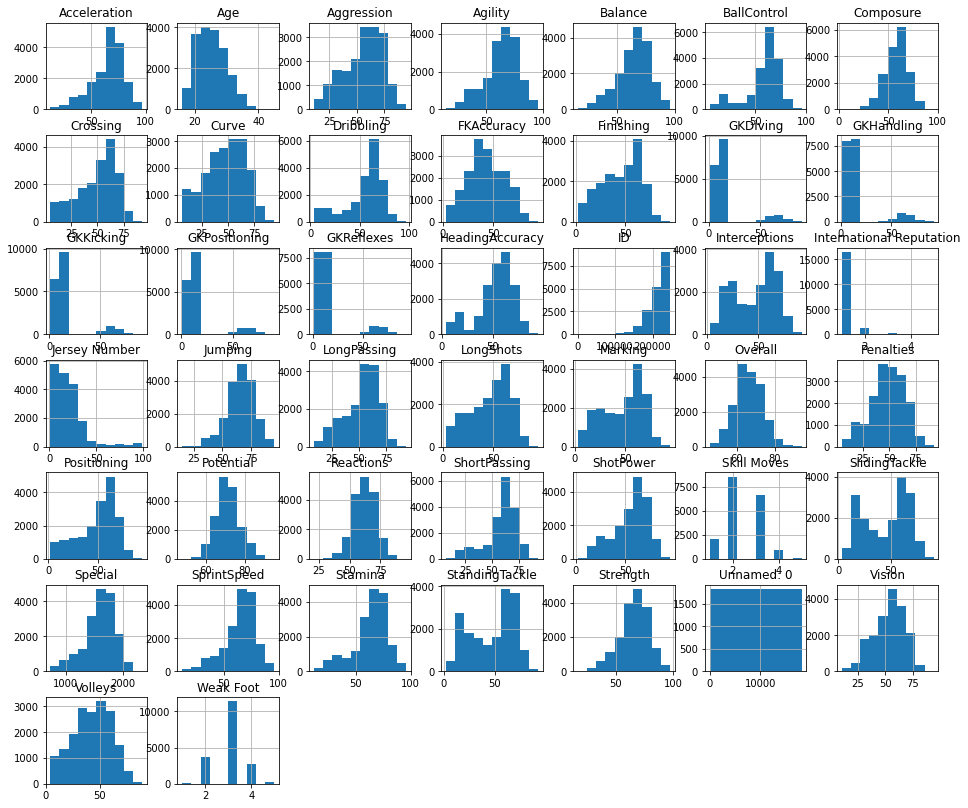

In [11]:
df.hist(figsize=(16, 14))
pyplot.show()

### Correlation heatmap
Let's first draw correlation heatmap and try to figure out some correlations. That way we neglect a lot of unnecessary relations and find out some good ones.

Text(0.5, 1.0, 'Heatmap of dataset')

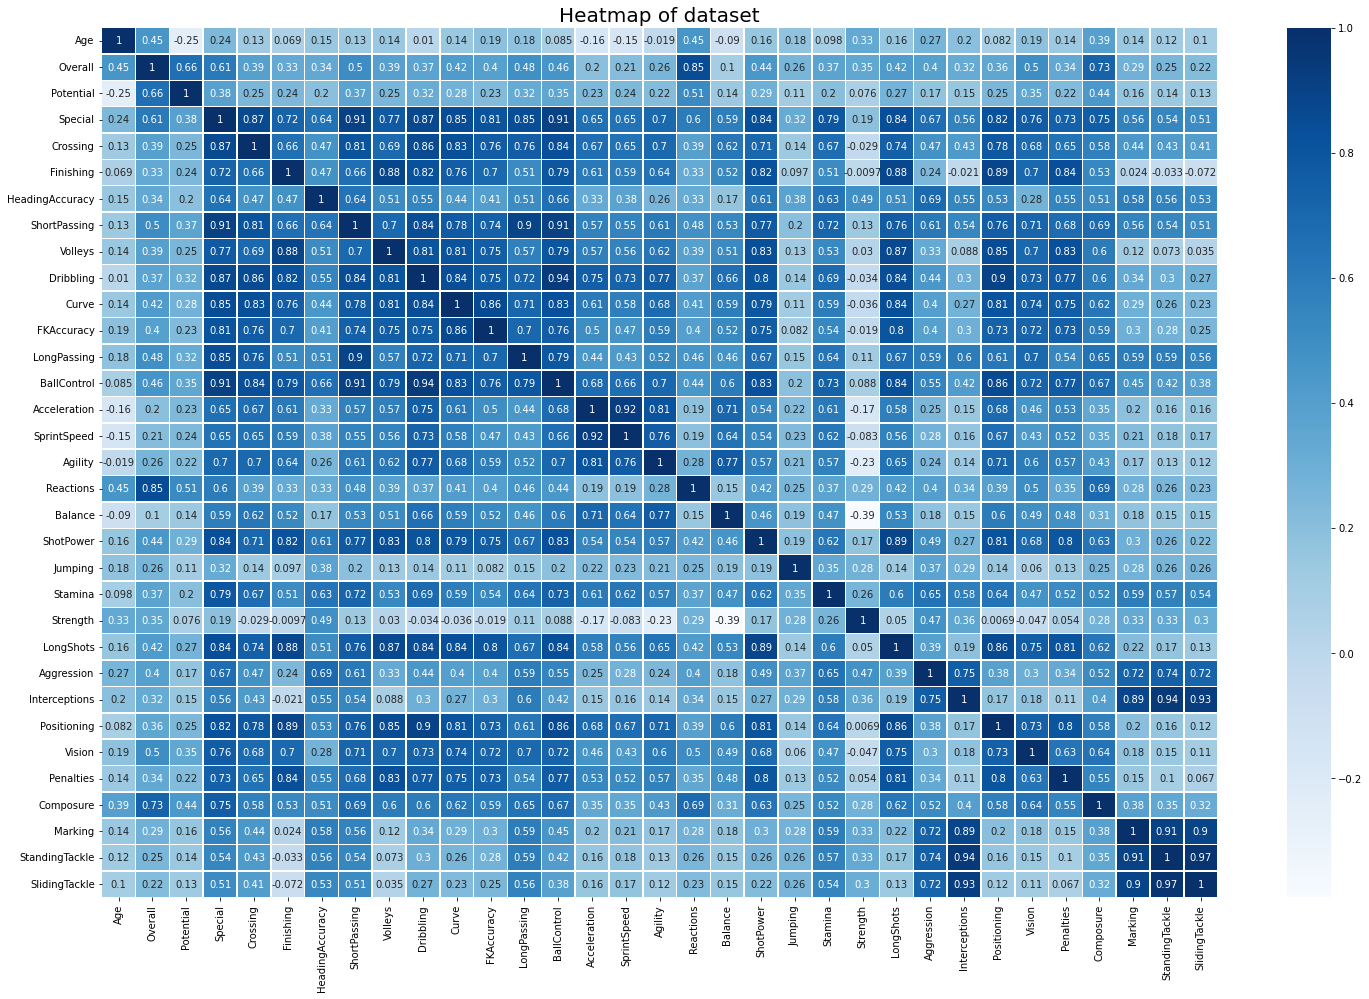

In [13]:
plt.rcParams['figure.figsize']=(25,16)
hm=sns.heatmap(df[['Age', 'Overall', 'Potential', 'Special',
    'Body Type', 'Position',
    'Height', 'Weight', 'Crossing',
    'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
    'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
    'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
    'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
    'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
    'Marking', 'StandingTackle', 'SlidingTackle']].corr(), annot = True, linewidths=.5, cmap='Blues')
hm.set_title(label='Heatmap of dataset', fontsize=20)

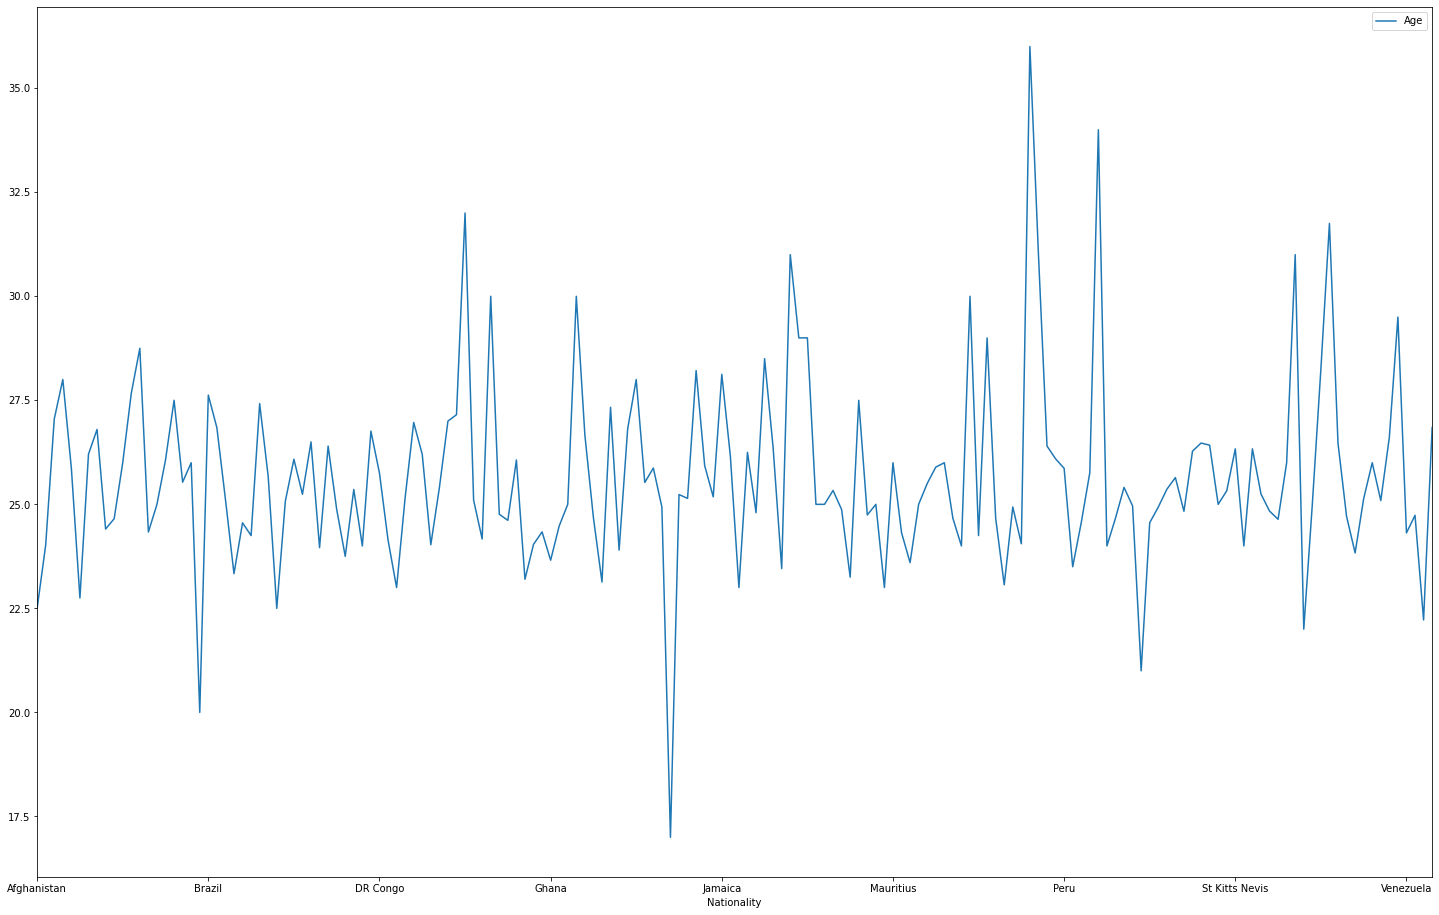

In [17]:
x = df.pivot_table(index = 'Nationality',
                     values = 'Age',
                     aggfunc = 'mean').plot(kind='line')

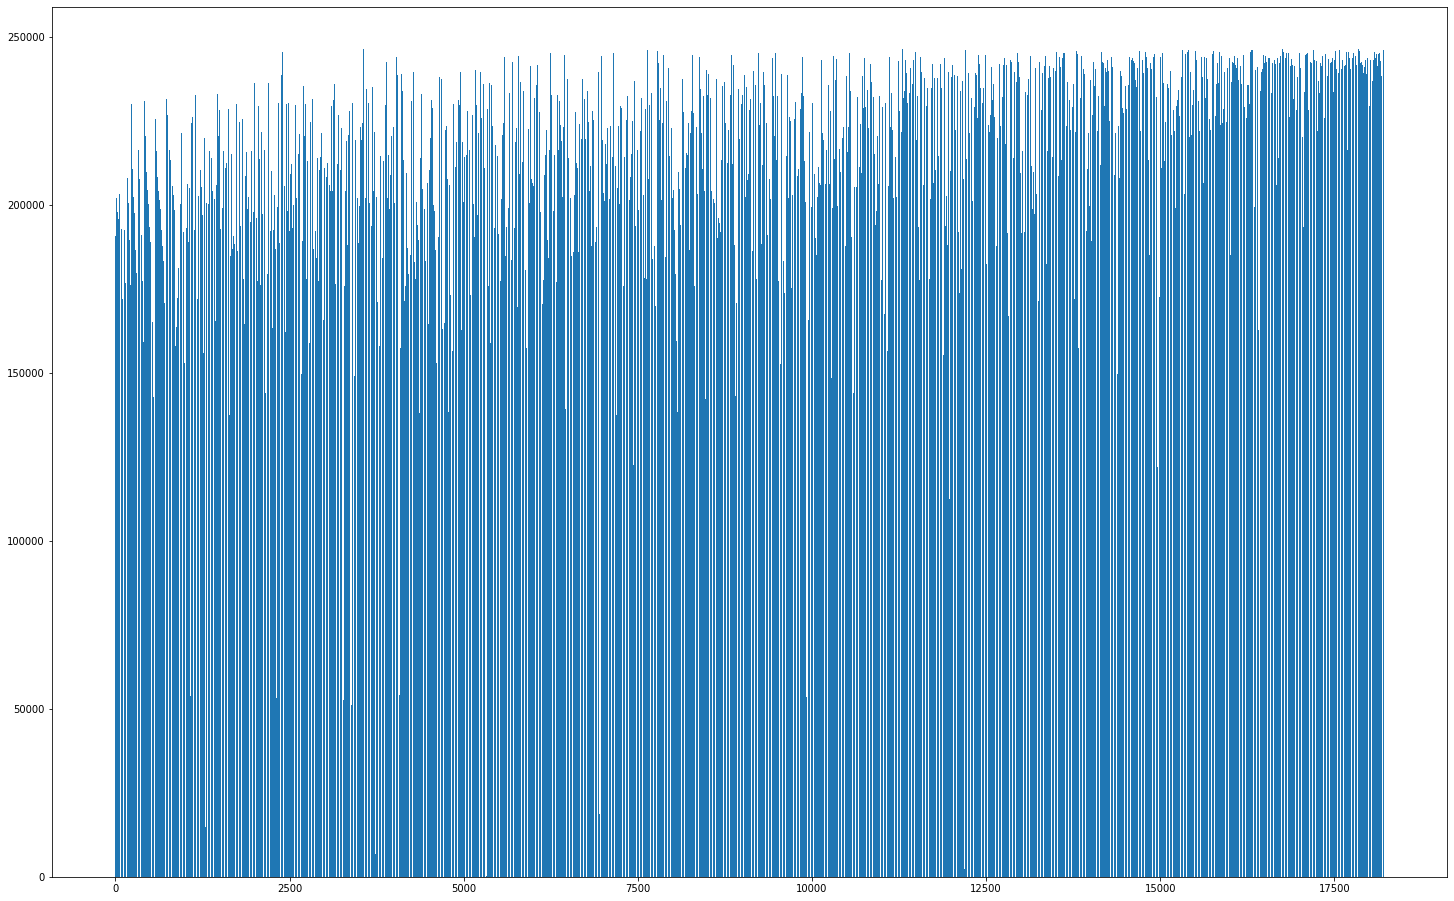

In [20]:
plt.bar(x=df.index,height=df.ID)
plt.show()

<BarContainer object of 29 artists>

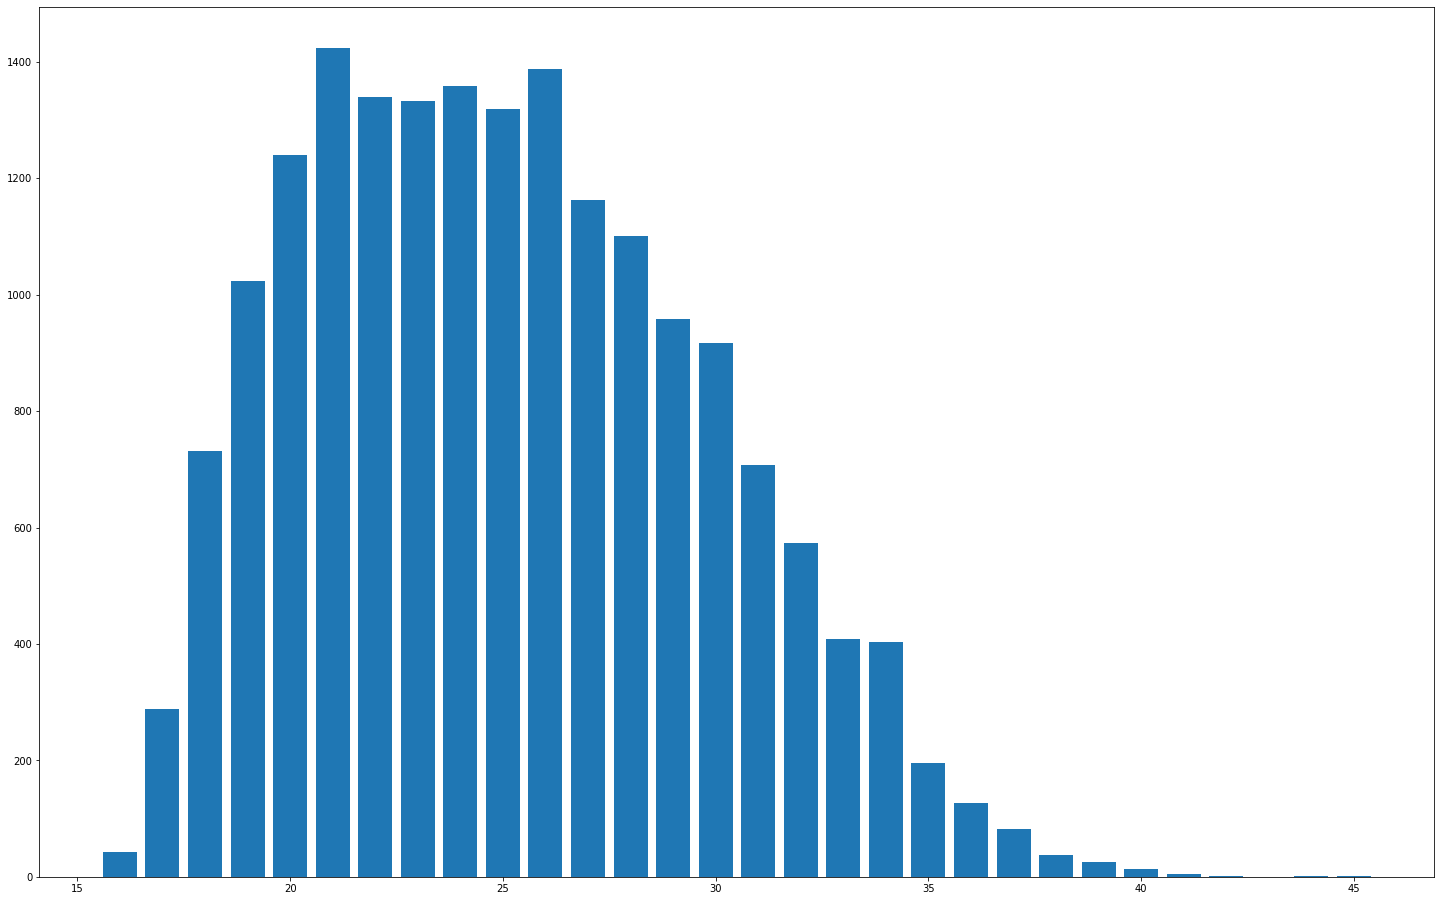

In [21]:
d1 = df[['ID','Age']].groupby(['Age']).count()
plt.bar(x=d1.index,height=d1.ID)

### Ploting histogram and kde plots on attributes like ‘Value’ and ‘Wage’

<AxesSubplot:>

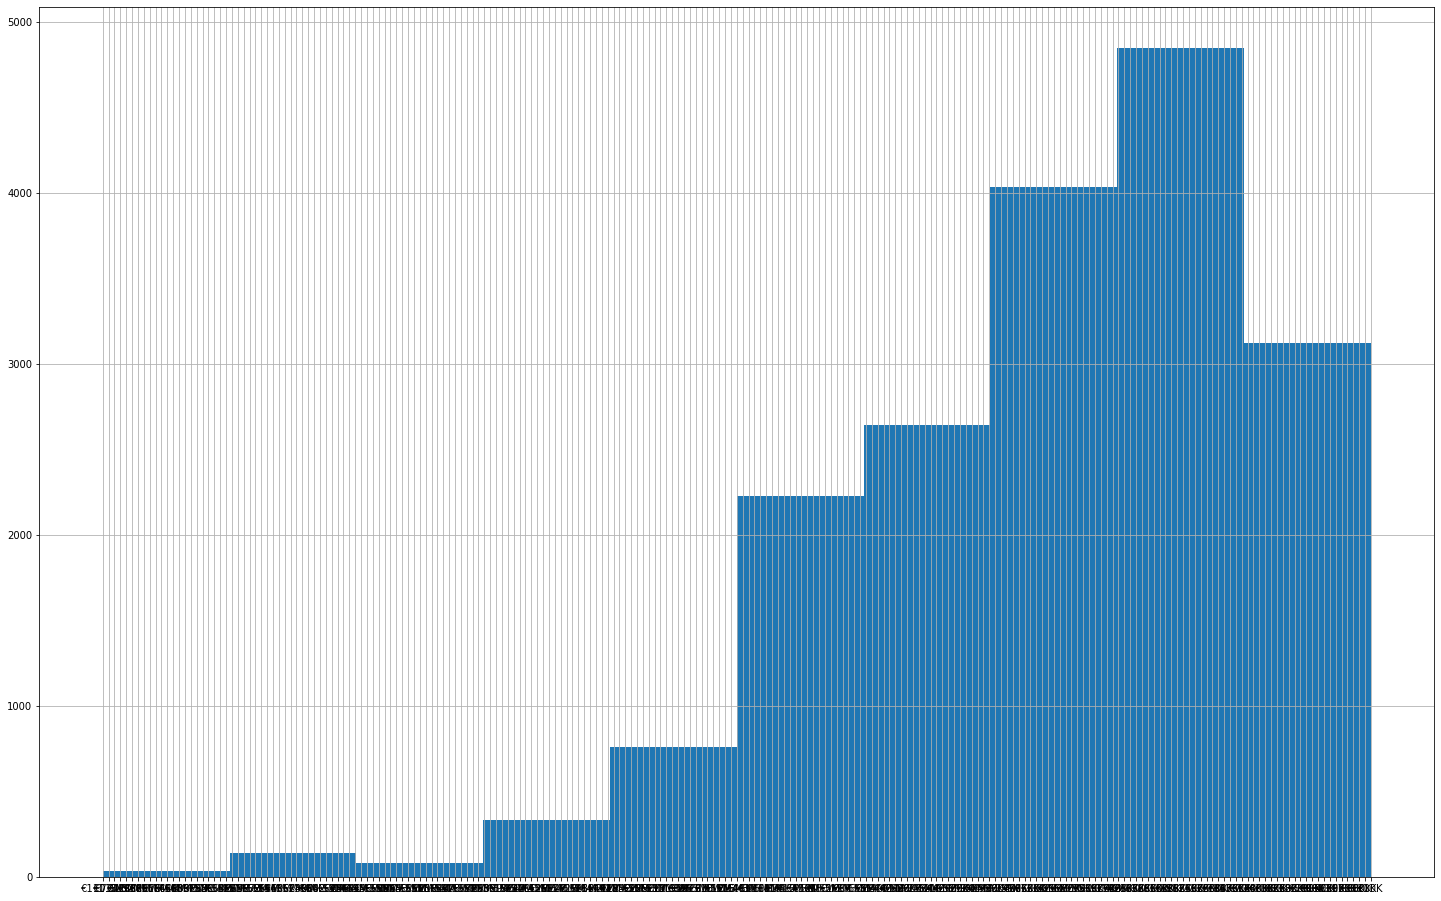

In [22]:
df.Value.hist()

<AxesSubplot:>

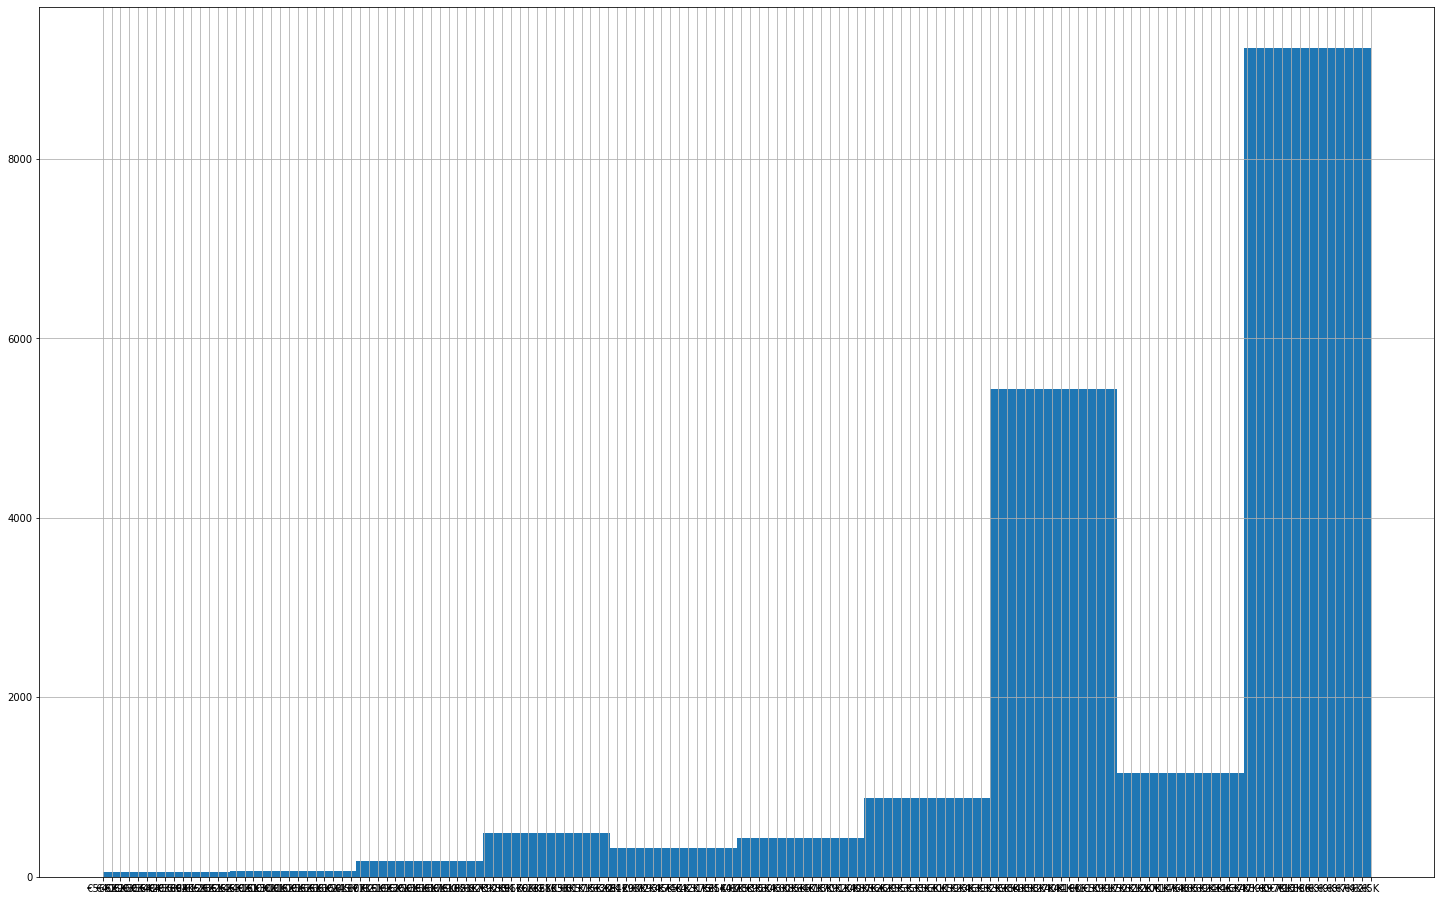

In [23]:
df.Wage.hist()

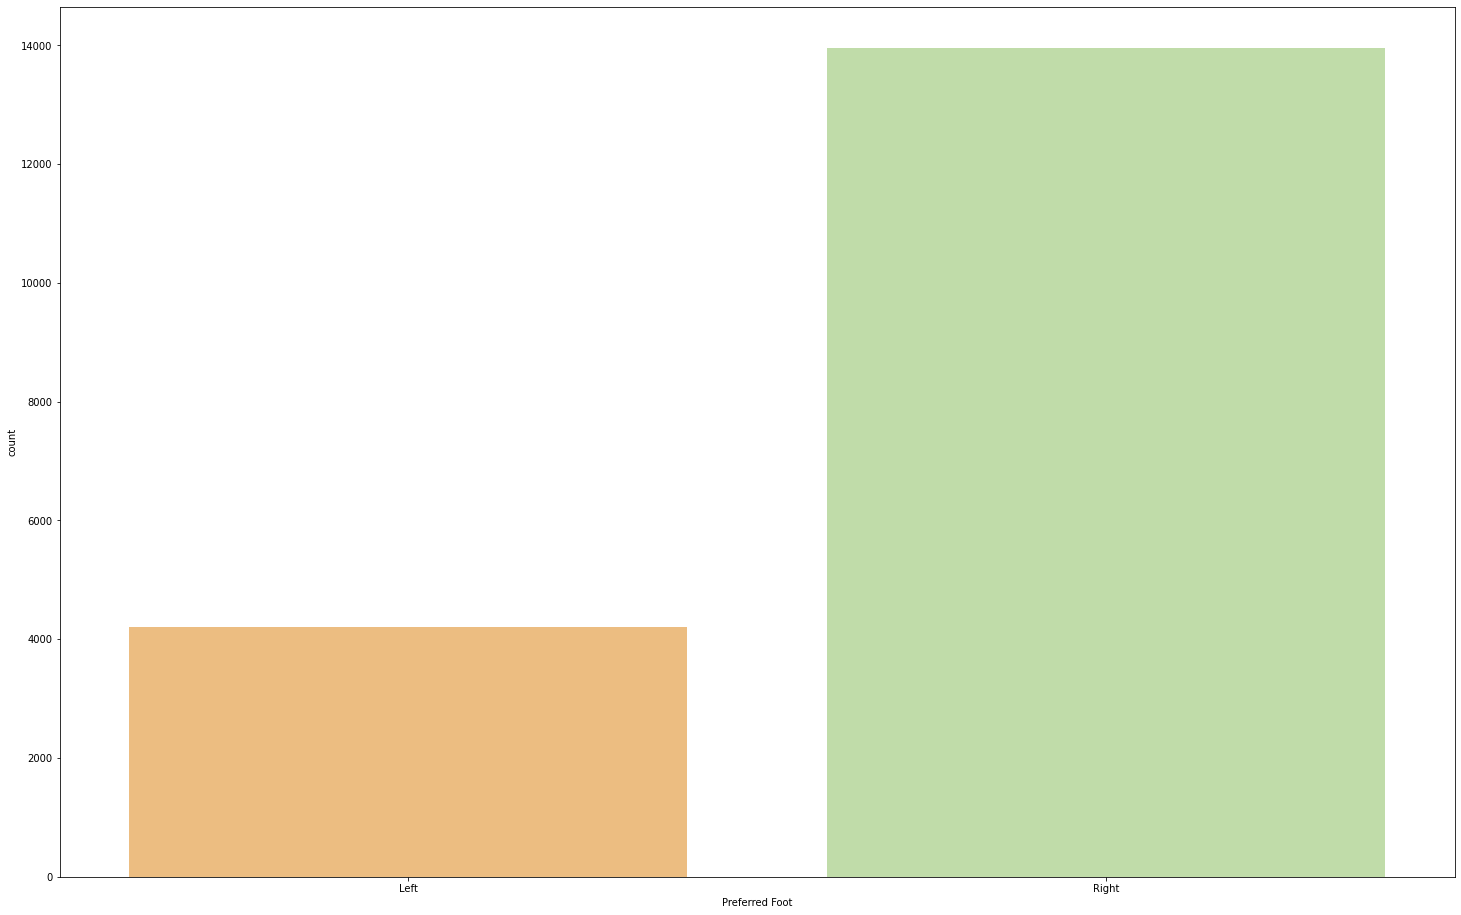

In [24]:
sns.countplot(df['Preferred Foot'],palette='Spectral');

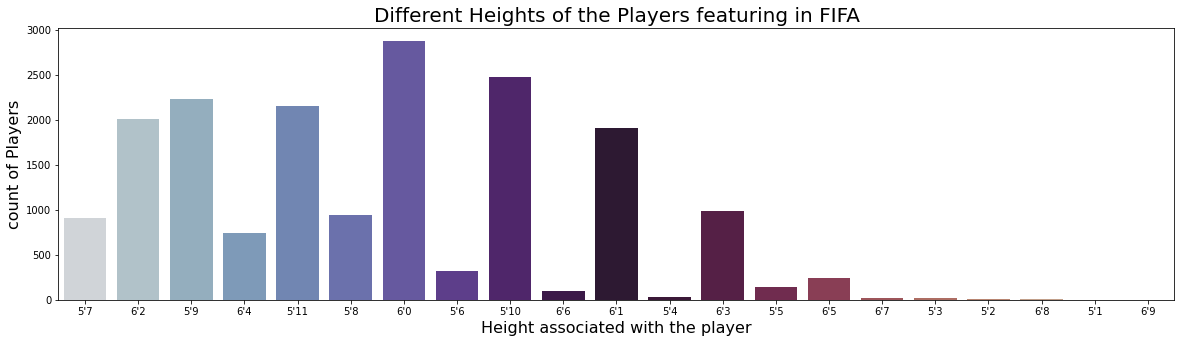

In [29]:
df['Height'].head()
plt.figure(figsize = (20, 5))
plt.style.use('tableau-colorblind10')
sns.countplot(df['Height'],palette='twilight')
plt.title('Different Heights of the Players featuring in FIFA', fontsize = 20)
plt.xlabel('Height associated with the player', fontsize = 16)
plt.ylabel('count of Players', fontsize = 16)
plt.show()

### Lets see top 20 countries with most players featured in FIFA

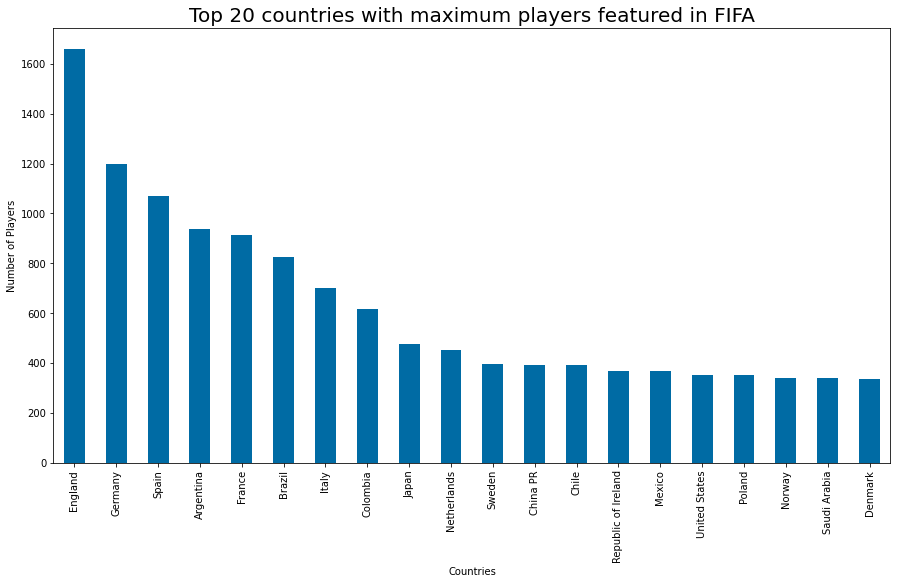

In [31]:
plt.figure(figsize=(15,8));
df['Nationality'].value_counts().head(20).plot.bar();
plt.title("Top 20 countries with maximum players featured in FIFA",fontsize=20);
plt.xlabel("Countries");
plt.ylabel("Number of Players");

### Let's check top 20 clubs with maximum players featured in FIFA

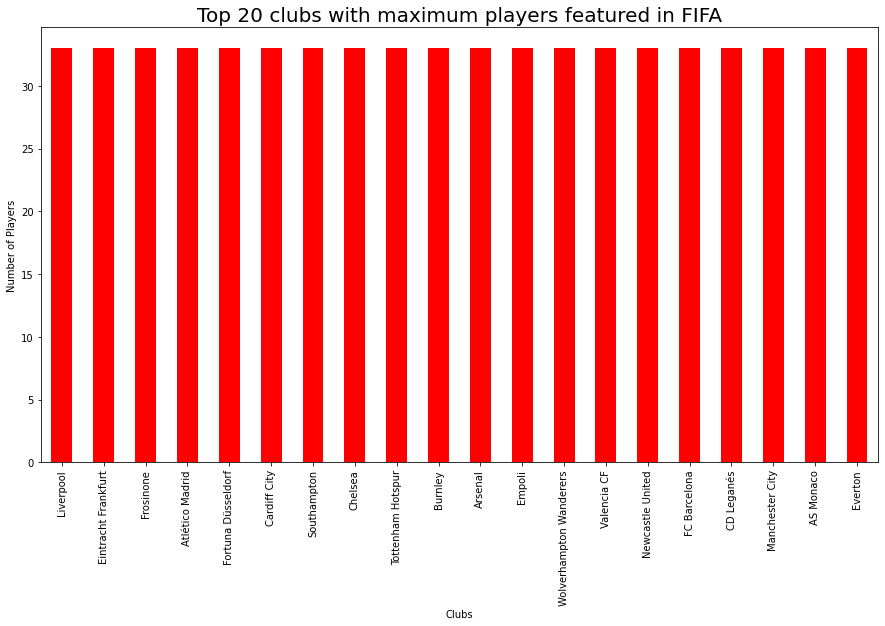

In [32]:
plt.figure(figsize=(15,8));
df['Club'].value_counts()[1:21].plot.bar(color='red');
plt.title("Top 20 clubs with maximum players featured in FIFA",fontsize=20);
plt.xlabel("Clubs");
plt.ylabel("Number of Players");

### Let's check total number of players at each position featured in FIFA
Now let's check top 10 clubs with highest avergage wages.for this we need to convert wages into numerical values

In [33]:
# Supporting function to convert string values into numbers
def wage_convert(amount):
    temp = amount.replace('€', '')
    if 'M' in temp:
        temp = float(temp.replace('M', ''))*1000000
    elif 'K' in amount:
        temp = float(temp.replace('K', ''))*1000
    return float(temp)

In [34]:
df['Wage_Number']  = df['Wage'].apply(lambda x: wage_convert(x))

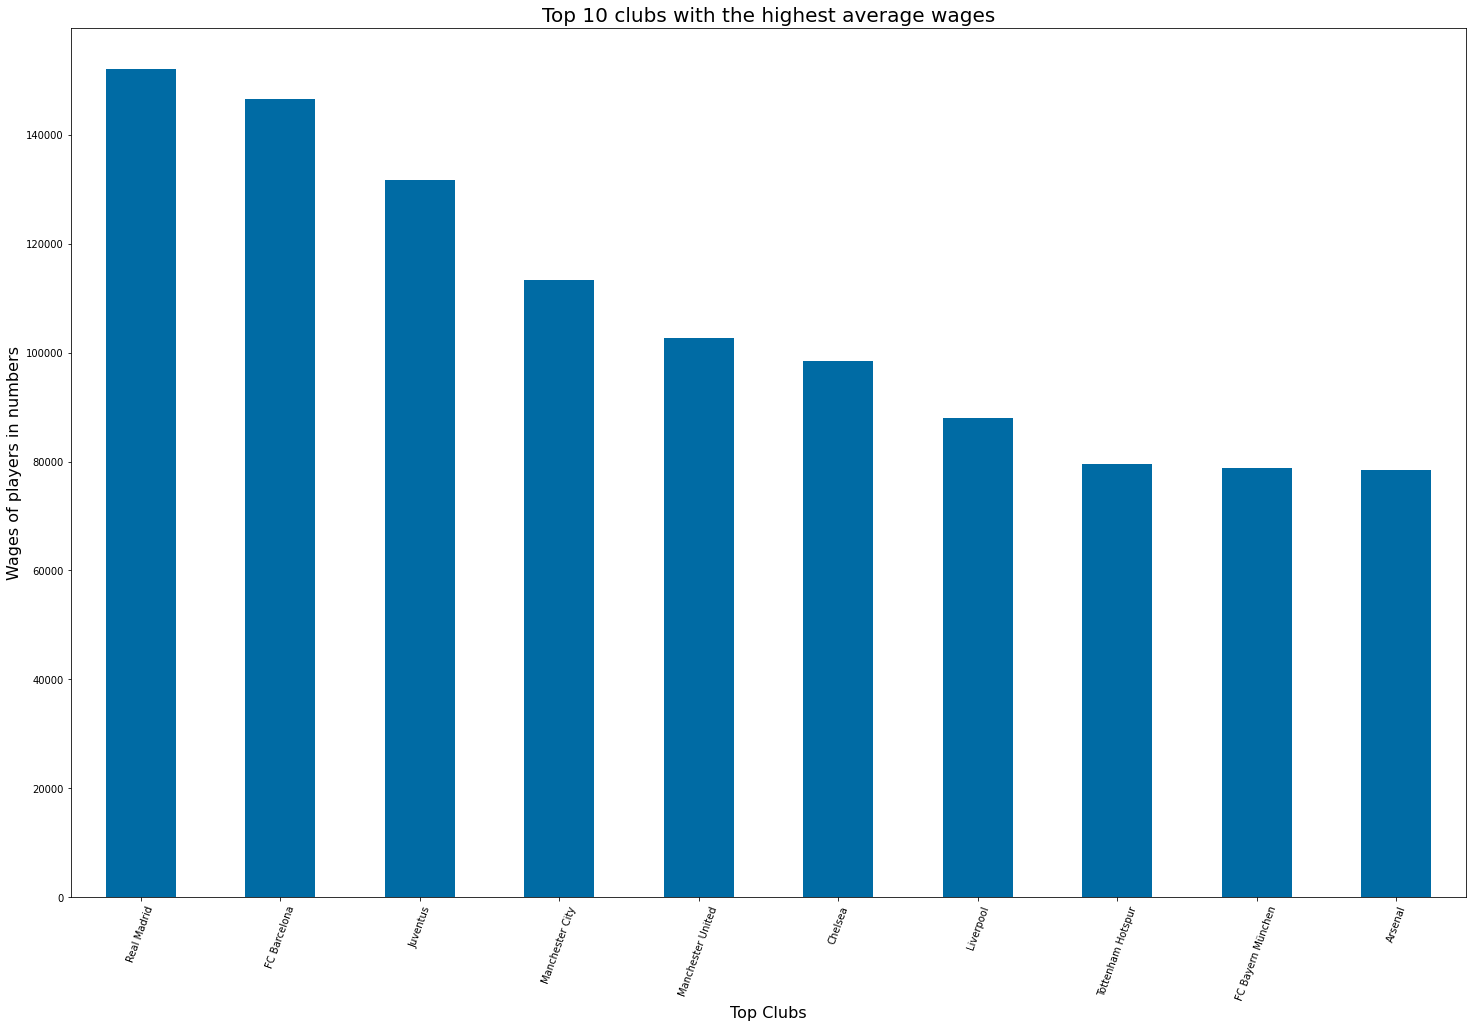

In [35]:
# Find out the top 10 clubs with the highest average wage
wage_data=df[["Name", "Club","Wage_Number"]]

wage_data.groupby("Club")["Wage_Number"].mean().sort_values(ascending=False).head(10).plot(kind="bar");
plt.title("Top 10 clubs with the highest average wages",fontsize=20);
plt.ylabel("Wages of players in numbers",fontsize=16);
plt.xlabel("Top Clubs",fontsize=16);
plt.xticks(rotation=70);

In [47]:
import plotly.graph_objs as go
import plotly.offline as py
import plotly.offline as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

df_nations = df.groupby(by='Nationality').size().reset_index()
df_nations.columns = ['Nation', 'Count']
df_nations[(df_nations['Nation'] == 'England') | (df_nations['Nation'] == 'Wales') 
           | (df_nations['Nation'] == 'Scotland') | (df_nations['Nation'] == 'Northern Ireland') ]
df_temp = pd.DataFrame(data= [['United Kingdom', 2148]], columns=['Nation', 'Count'])
df_nations = df_nations.append(df_temp, ignore_index=True)
df_nations.tail()
trace2 = dict(type='choropleth',
              locations=df_nations['Nation'],
              z=df_nations['Count'],
              locationmode='country names',
              colorscale='Portland'
             )

layout = go.Layout(title='<b>Number of Players in each Country</b>',
                   geo=dict(showocean=True,
                            oceancolor='#AEDFDF',
                            projection=dict(type='natural earth'),
                        )
                  )

fig = go.Figure(data=[trace2], layout=layout)
py.iplot(fig)

In [56]:
!pip install pandas-profiling

  Using cached htmlmin-0.1.12.tar.gz (19 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached missingno-0.5.0-py3-none-any.whl (8.8 kB)
  Using cached tangled_up_in_unicode-0.1.0-py3-none-any.whl (3.1 MB)
  Using cached ImageHash-4.2.1.tar.gz (812 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=a1244dd7ee0bf1036b3803fcbced161208dcb6810f82a4e934cceeadfbbf6e2f
  Stored in directory: c:\users\akash\appdata\local\pip\cache\wheels\c3\fe\0b\4450b38bceb9ae43dd7d0f16e353566f30f5f4d59a58eca2ed
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=c00dadb9a2389200258b69cd42ca60f33c4c2f1a3b62a36c5065f1bab7271f46
  Stored in directory: c:\users\akash\appdata\local\pip\cache\wheels\5e\77\4c\7291601777365dd7db8a3b309006122d515ee5ac086f2f5866
Succes

In [57]:
from pandas_profiling import ProfileReport

In [58]:
pro = ProfileReport(df,explorative=True)
pro.to_file('output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [48]:
pip install sweetviz

Note: you may need to restart the kernel to use updated packages.


In [54]:
import sweetviz as sz

In [55]:
report = sz.analyze(df)
report.show_html('sweetviz.html')

                                             |                                             | [  0%]   00:00 ->…

Report sweetviz.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Thank you